In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as LA
from scipy import stats as stats
import matplotlib.cm as cm
from PIL import Image
plt.style.use("ggplot")
plt.rcParams["font.family"] = "Osaka"

   Unnamed: 0  eruptions  waiting
0           1      3.600       79
1           2      1.800       54
2           3      3.333       74
3           4      2.283       62
4           5      4.533       85
Index(['Unnamed: 0', 'eruptions', 'waiting'], dtype='object')
   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85
(272, 2)
[ 3.48778309 70.89705882]


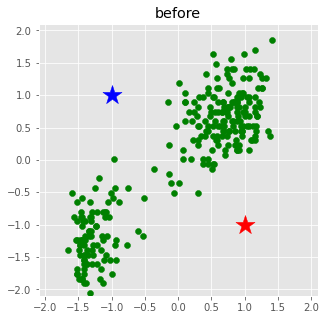

In [29]:
data = pd.read_csv("/content/drive/My Drive/ColabNotebooks/PRML/9章/faithful.csv",sep=",")
print(data.head())
print(data.columns)
data.pop('Unnamed: 0')
print(data.head())
data = data.values
print(data.shape)
data_center = np.array([data[:,0].mean(),data[:,1].mean()])
print(data_center)
center_data = data - data_center
plt.figure(figsize=(5,5))
data = center_data / np.array([data[:,0].std(), data[:,1].std()])
plt.scatter(data[:,0], data[:,1], c="g")

mu1 = np.array([1.,-1.])
mu2 = np.array([-1.,1.])

plt.scatter(mu1[0], mu1[1], s=400, marker="*", c="r")
plt.scatter(mu2[0], mu2[1], s=400, marker="*", c="b")
plt.xlim(-2.1, 2.1)
plt.ylim(-2.1, 2.1)
plt.title("before")
plt.show()

In [31]:
mu1

array([ 1., -1.])

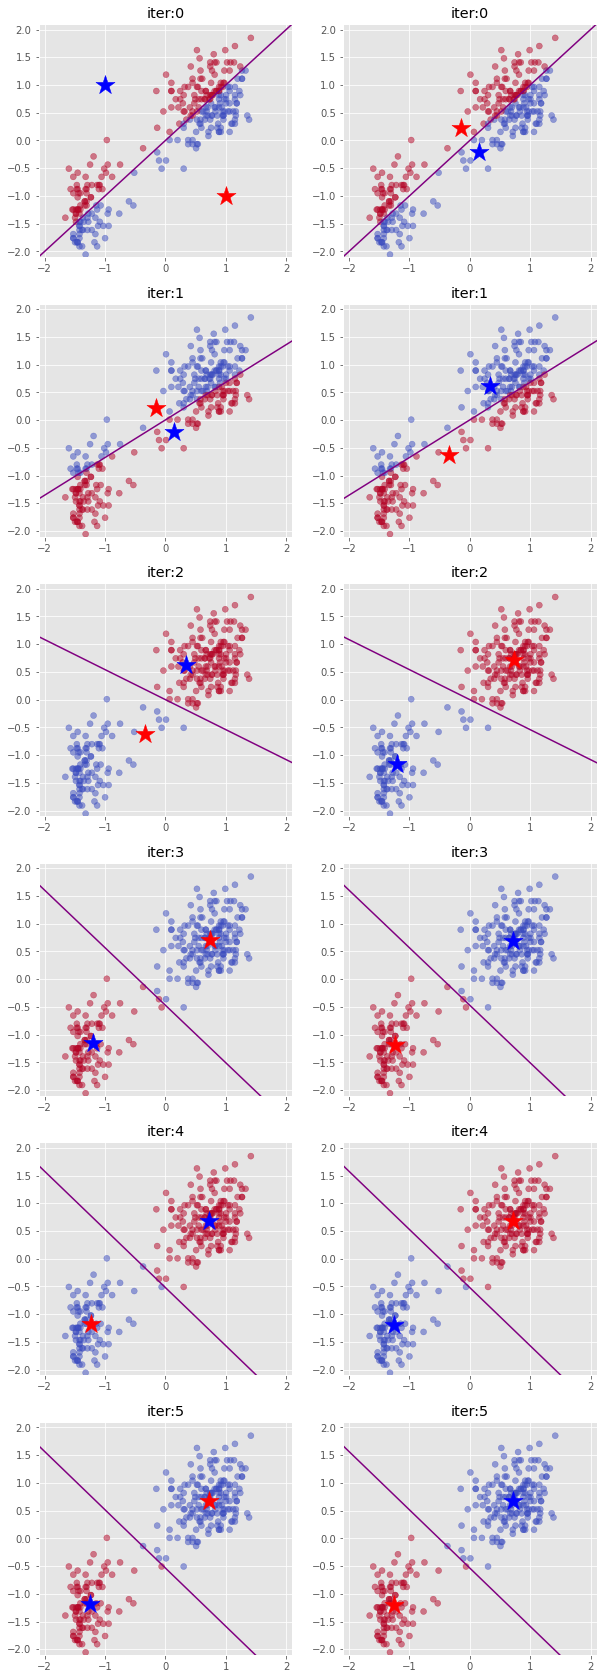

In [62]:
def border(x):
  center = (mu1 + mu2) /2
  return - ( mu1[0] - mu2[0] ) / (mu1[1] - mu2[1]) * (x - center[0]) + center[1]
mu1 = np.array([1.,-1.])
mu2 = np.array([-1.,1.])
fig, axes = plt.subplots(6, 2, figsize=(10,30))
N = data.shape[0]
for i in range(6):
  # Exp step
  r = ((data - mu1)**2).sum(axis=1) > ((data - mu2)**2).sum(axis=1) # (data.shape[0])

  axes[i, 0].scatter(data[:,0], data[:,1], c=r, cmap=cm.coolwarm, alpha=0.5)
  axes[i, 0].scatter(mu1[0], mu1[1], s=400, marker="*", c="r")
  axes[i, 0].scatter(mu2[0], mu2[1], s=400, marker="*", c="b")

  x_ = np.linspace(-2.1, 2.1)
  y_ = border(x_)

  axes[i, 0].plot(x_, y_, c="purple")
  axes[i, 0].set_xlim(-2.1, 2.1)
  axes[i, 0].set_ylim(-2.1, 2.1)
  axes[i, 0].set_title(f"iter:{i}")

  # Max Step
  R = np.repeat(r[:,None], 2, axis=1)
  N1 = r.sum()
  M1 = (R.astype(float)*data) / N1
  mu1 = np.array([M1[:,0].sum(), M1[:,1].sum()])
  M2 = (-(R.astype(float)-1)*data) / (N - N1)
  mu2 = np.array([M2[:,0].sum(), M2[:,1].sum()])

  axes[i, 1].plot(x_, y_, c="purple")
  axes[i, 1].scatter(data[:,0], data[:,1], c = r, cmap=cm.coolwarm, alpha=0.5)
  axes[i, 1].scatter(mu1[0], mu1[1], marker="*", s=400, c="r")
  axes[i, 1].scatter(mu2[0], mu2[1], marker="*", s=400, c="b")
  axes[i, 1].set_xlim(-2.1, 2.1)
  axes[i, 1].set_ylim(-2.1, 2.1)
  axes[i, 1].set_title(f"iter:{i}")

## k-meanを用いた画像圧縮

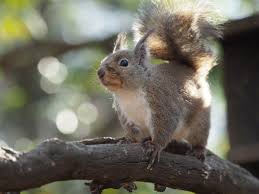

In [63]:
image = Image.open("/content/drive/My Drive/ColabNotebooks/PRML/9章/1.jpg")
image

[203.12028801 213.62007624 215.2592122 ]
[205.09540636 208.31639032 196.96534384]
2


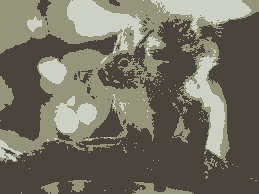

In [71]:
image_arr = np.array(image)
original_shape = image_arr.shape
image_arr_df = pd.DataFrame(image_arr.reshape(-1,3)) #(pixel_size, 3)

mu1 = np.array([100., 120., 160.])
mu2 = np.array([130., 120., 120.])
mu3 = np.array([140., 150., 80.])

for i in range(10):
  distance_df = pd.DataFrame(((image_arr_df - mu1)**2).sum(axis=1)) 
  # (pixel_size, 3) - (1, 3) = (pixel_size, 3) & sum(axis=1) -> (pixel_size)
  distance_df[1] =  pd.DataFrame(((image_arr_df - mu2)**2).sum(axis=1))
  distance_df[2] =  pd.DataFrame(((image_arr_df - mu3)**2).sum(axis=1))
  # distance_df: size=(3, pixel_size)
  r = distance_df.apply(np.argmin, axis=1)
  # r: int, size=(pixel_size)

  mu1_ = np.array(image_arr_df[r==0].mean()) #(pixel_size(r==0), 3)
  mu2_ = np.array(image_arr_df[r==1].mean())
  mu3_ = np.array(image_arr_df[r==2].mean())

  if LA.norm(mu1_ - mu1) / LA.norm(mu1) < 0.01:
    print(i)
    break
  mu1 = mu1_
  mu2 = mu2_
  mu3 = mu3_
  print(mu1)

image_arr_df[r == 0] = np.zeros(image_arr_df[r==0].shape) + mu1
image_arr_df[r == 1] = np.zeros(image_arr_df[r==1].shape) + mu2
image_arr_df[r == 2] = np.zeros(image_arr_df[r==2].shape) + mu3

Image.fromarray(np.array(image_arr_df).reshape(original_shape).astype(np.uint8))

In [72]:
print(mu1)
print(mu2)
print(mu3)

[205.09540636 208.31639032 196.96534384]
[74.77021657 69.5372601  60.92239919]
[148.42428311 149.91627506 123.61436655]
